# Error Correction Comparision Between a Reciprocal and Non-Reciprocal Device
The purpose of this notebook is to compare the results of applying functions in pyMez.Code.Analysis.SParameter with the application of corrections directly through StatistiCAL

Overview:
1. Start StatistiCAL
2. Select Help->Load Sample Problem with DUT
3. Press Calibrate
4. Select Results->Save Corrected DUT->Save as DUT.txt
5. Select Results->Save 12 Term Error Correction->Save as ErrorCoefficents.txt
6. Select Results->Save Solution Vector -> Solution_Plus.txt (Saves isolation and switch terms too, Has both recip and non recip)
7. Select Results->Save 4-port error box-> ErrorBox.s4p
7. Open and Plot corrected DUT using pyMez (this is an average I think DY202, DY2022, DY202 measured with Rnd noise,etc)
8. Open DY202 with pyMez, Open SolutionVector, Open ErrorCoefficents
9. Correct DY202 and store as s2p
10. Plot DUT, and Corrected DY202 using both methods 

In [1]:
import re,os
from pyMez import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 0.200986 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.047619 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 0.675472 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.000427 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.029761 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.000708 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
FAILED to import file!
Moving to parsing unknown schema
C:\Users\sandersa\.conda\envs\pyMez\Lib\site-packages\pyMez\Code\DataHandlers\Tests\Line_4909_WR15_Wave_Parameters_Port2_20180313_001.w1p sucessfully parsed
FAILED to import file!
Moving to parsing unknown schema
C:\Users\sandersa\.conda\envs\pyMez\L

In [8]:
JUPYTER_DIRECTORY=os.getcwd()
TEST_DIRECTORY=os.path.join(JUPYTER_DIRECTORY,"Error_Correction_Comparison_Files")

In [9]:
# File that happens after Results->Save Corrected DUT sparameters
corrected_DUT=S2PV1(os.path.join(TEST_DIRECTORY,"DUT.txt"))
# File that results if you open CalibrateDUT.EXE and use the 12 term correction and then save the result usigng DY202.txt
StatistiCAL_corrected_DUT=S2PV1(os.path.join(TEST_DIRECTORY,"TwelveTermCorrectedDUTStatistiCAL.txt"))
# The files it averaged to get corrected_DUT before averaging
uncorrected_DUTs=map(lambda x:S2PV1(os.path.join(TEST_DIRECTORY,x)),["DY202.txt","DY2022.txt",
                                        "DY202_measured with rnd.txt",
                                        "DY202_measured with rnd1.txt"])

In [10]:
%matplotlib notebook
corrected_DUT.show()
plt.suptitle("DUT File Saved By StatistiCAL ",y=1)
plt.tight_layout()

<IPython.core.display.Javascript object>

In [11]:
StatistiCAL_corrected_DUT.show()
plt.suptitle("DUT File Saved By Appling Twelve term using Twelve Term Error Correction ",y=1)
plt.tight_layout()

<IPython.core.display.Javascript object>

In [12]:
# open the correction files
twelve_term=TwelveTermErrorModel(os.path.join(TEST_DIRECTORY,"CalCoefficients.txt"))
solution_vector=StatistiCALSolutionModel(os.path.join(TEST_DIRECTORY,"Solution_Plus.txt"))
solution_vector_nonreciprocal=StatistiCALSolutionModel(os.path.join(TEST_DIRECTORY,"Solution_Plus.txt"),reciprocal=False)
switch_terms=S2PV1(os.path.join(TEST_DIRECTORY,"SwitchTerms.txt"))
four_port=SNP(os.path.join(TEST_DIRECTORY,"ErrorBox.s4p"))

NameError: name 'StatistiCALSolutionModel' is not defined

In [7]:
# using the correct_switch_terms method of the S2PV1 class
switch_corrected_DUTS=map(lambda x: x.correct_switch_terms(switch_terms.sparameter_complex),uncorrected_DUTs)

In [6]:
# Calculating all the corrections
pyMez_corrected_complex=map(lambda x:correct_sparameters_twelve_term(x.sparameter_complex,
                                                                      twelve_term.complex_data),uncorrected_DUTs)
pyMez_corrected_complex_nonreciprocal=map(lambda x:correct_sparameters_twelve_term(x.sparameter_complex,
                                                                      twelve_term.complex_data,reciprocal=False),
                                uncorrected_DUTs)
pyMez_eight_term_complex=map(lambda x:correct_sparameters_eight_term(x.sparameter_complex,
                                                                      solution_vector.eight_term_correction),uncorrected_DUTs)
pyMez_eight_term_complex_nonreciprocal=map(lambda x:correct_sparameters_eight_term(x.sparameter_complex,
                                                                      solution_vector.eight_term_correction,
                                                                                       reciprocal=False),uncorrected_DUTs)
pyMez_sixteen_term_complex=map(lambda x:correct_sparameters_sixteen_term(x.sparameter_complex,
                                                                   four_port.sparameter_complex),uncorrected_DUTs)
switch_corrected_DUTS=[]
for dut in uncorrected_DUTs:
    dut.correct_switch_terms(switch_terms.sparameter_complex)
    switch_corrected_DUTS.append(dut)
pyMez_eight_term_complex_sw=map(lambda x:correct_sparameters_eight_term(x.corrected_data,
                                                                      solution_vector.eight_term_correction),switch_corrected_DUTS)

NameError: name 'switch_terms' is not defined

In [10]:
pyMez_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),pyMez_corrected_complex)
pyMez_corrected_nonreciprocal_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),
                                           pyMez_corrected_complex_nonreciprocal)
pyMez_eight_term_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),pyMez_eight_term_complex)
pyMez_eight_term__nonreciprocal_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),
                                                       pyMez_eight_term_complex_nonreciprocal)
pyMez_eight_term_corrected_DUTS_sw=map(lambda x:S2PV1(None,sparameter_complex=x),pyMez_eight_term_complex_sw)
pyMez_sixteen_term_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),pyMez_sixteen_term_complex)

<IPython.core.display.Javascript object>


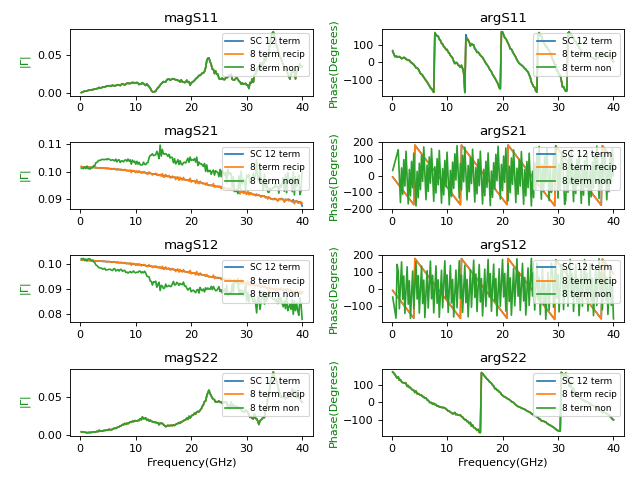

In [18]:
# comparison of using both software packages to apply corrections in MA format
compare_s2p_plots([StatistiCAL_corrected_DUT,pyMez_eight_term_corrected_DUTS[0],
                   pyMez_eight_term__nonreciprocal_corrected_DUTS[0]],labels=["SC 12 term","8 term recip","8 term non"]);

<IPython.core.display.Javascript object>


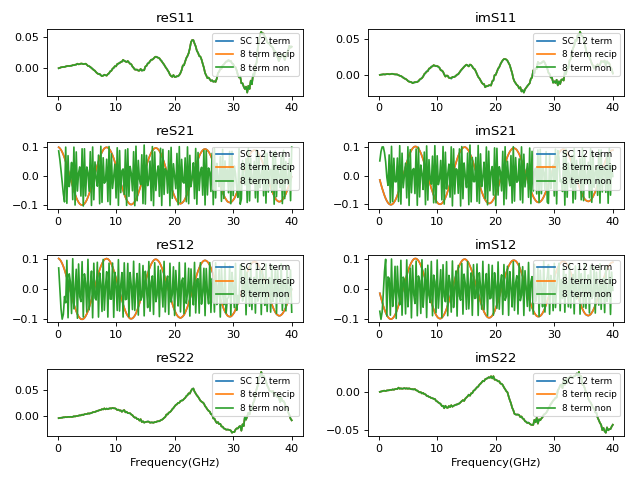

In [17]:
# Same plot as above but in RI format
compare_s2p_plots([StatistiCAL_corrected_DUT,pyMez_eight_term_corrected_DUTS[0],
                   pyMez_eight_term__nonreciprocal_corrected_DUTS[0]],format="RI",
                  labels=["SC 12 term","8 term recip","8 term non"]);

<IPython.core.display.Javascript object>


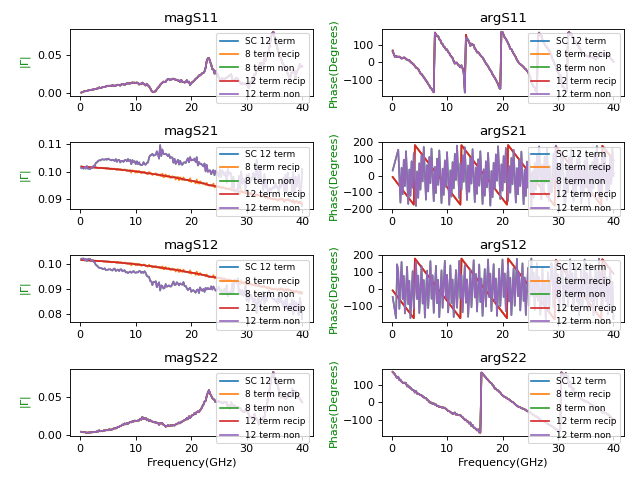

In [16]:
# Comparison of using the 8 term and 12 term model for reciprocal and non-reciprocal corrections, 
# with statistiCAL applied correction (saved independently)
compare_s2p_plots([StatistiCAL_corrected_DUT,pyMez_eight_term_corrected_DUTS[0],
                   pyMez_eight_term__nonreciprocal_corrected_DUTS[0],
                   pyMez_corrected_DUTS[0],pyMez_eight_term__nonreciprocal_corrected_DUTS[0]],format="MA",
                  labels=["SC 12 term","8 term recip","8 term non","12 term recip","12 term non"]);